#XGBoost

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier


# Features and target
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: scaling (XGBoost works without it, but helps sometimes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

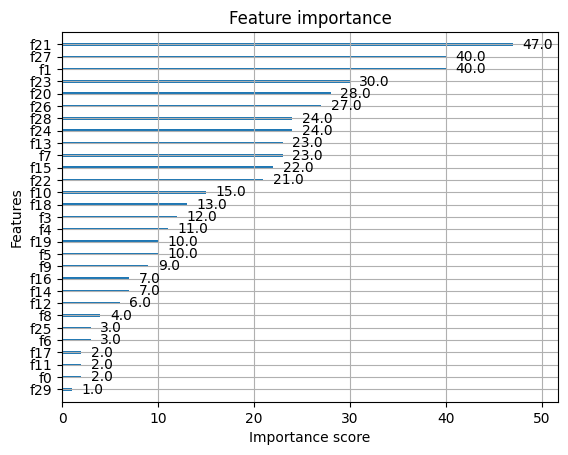

In [2]:
# Install if not already
# pip install xgboost scikit-learn

import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset (binary classification)
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train XGBoost model
model = xgb.XGBClassifier(
    n_estimators=100,      # Number of trees
    learning_rate=0.1,     # Step size shrinkage
    max_depth=4,           # Max depth of trees
    subsample=0.8,         # Row sampling
    colsample_bytree=0.8,  # Feature sampling
    random_state=42
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Feature importance
xgb.plot_importance(model)


#NN
  - implement using CNN

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

# Load dataset
df = pd.read_csv("/content/sample_data/heart.csv", encoding='latin-1')

# Features and target (assuming 'target' is the column to predict)
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Neural Network
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(1, activation='sigmoid'))
# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
# The model.fit function is designed to work with numpy arrays or tensorflow tensors.
# Since X_train and X_test are numpy arrays after scaling, they are suitable for model.fit.
# y_train and y_test should also be in a suitable format, which they are from train_test_split.
model.fit(X_train, y_train, epochs=35, batch_size=16, verbose=1, validation_split=0.1)

# Evaluate
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Epoch 1/35


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6865 - loss: 0.5987 - val_accuracy: 0.8049 - val_loss: 0.5168
Epoch 2/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8418 - loss: 0.3960 - val_accuracy: 0.8049 - val_loss: 0.4624
Epoch 3/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8687 - loss: 0.3253 - val_accuracy: 0.7927 - val_loss: 0.4411
Epoch 4/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8646 - loss: 0.3438 - val_accuracy: 0.8293 - val_loss: 0.4139
Epoch 5/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8706 - loss: 0.2998 - val_accuracy: 0.8049 - val_loss: 0.3929
Epoch 6/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8678 - loss: 0.2910 - val_accuracy: 0.8049 - val_loss: 0.3912
Epoch 7/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8909 - loss: 0.2711 - val_accuracy: 0.8171 - val_loss: 0.3594
Epoch 8/35
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8969 - loss: 0.2891 - val_accuracy: 0.8171 - val_loss: 0.3403
Ep